# Import Libraries

In [168]:
# load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # train_test split function
from sklearn.model_selection import GridSearchCV
from sklearn import metrics  # accurate calculation
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from helpers import scikit_cv_result_to_df
from plotters import plot_means_w_stds, gen_and_plot_learning_curve


# Read Data

In [2]:
# load data
# bankchurners
data = pd.read_csv('BankChurners.csv')
# https://www.kaggle.com/sakshigoyal7/credit-card-customers
display(data.info(verbose=True, null_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Attrition_Flag            object 
 1   Customer_Age              int64  
 2   Gender                    object 
 3   Dependent_count           int64  
 4   Education_Level           object 
 5   Marital_Status            object 
 6   Income_Category           object 
 7   Card_Category             object 
 8   Months_on_book            int64  
 9   Total_Relationship_Count  int64  
 10  Months_Inactive_12_mon    int64  
 11  Contacts_Count_12_mon     int64  
 12  Credit_Limit              float64
 13  Total_Revolving_Bal       int64  
 14  Avg_Open_To_Buy           float64
 15  Total_Amt_Chng_Q4_Q1      float64
 16  Total_Trans_Amt           int64  
 17  Total_Trans_Ct            int64  
 18  Total_Ct_Chng_Q4_Q1       float64
 19  Avg_Utilization_Ratio     float64
dtypes: float64(5), int64(9), obj

None

In [3]:
# summarize how many % existing customer, % attrited customer
data['Attrition_Flag'].value_counts(normalize=True)

Existing Customer    0.83934
Attrited Customer    0.16066
Name: Attrition_Flag, dtype: float64

In [4]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

# Data Processing

In [5]:
data['Attrition_Flag'].replace({'Attrited Customer': 1, 'Existing Customer': 0}, inplace=True)
data['Gender'].replace({'M': 1, 'F': 0}, inplace=True)
display(data.info(verbose=True, null_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Attrition_Flag            int64  
 1   Customer_Age              int64  
 2   Gender                    int64  
 3   Dependent_count           int64  
 4   Education_Level           object 
 5   Marital_Status            object 
 6   Income_Category           object 
 7   Card_Category             object 
 8   Months_on_book            int64  
 9   Total_Relationship_Count  int64  
 10  Months_Inactive_12_mon    int64  
 11  Contacts_Count_12_mon     int64  
 12  Credit_Limit              float64
 13  Total_Revolving_Bal       int64  
 14  Avg_Open_To_Buy           float64
 15  Total_Amt_Chng_Q4_Q1      float64
 16  Total_Trans_Amt           int64  
 17  Total_Trans_Ct            int64  
 18  Total_Ct_Chng_Q4_Q1       float64
 19  Avg_Utilization_Ratio     float64
dtypes: float64(5), int64(11), ob

None

In [6]:
# convert bool and object to category 
cat_types = ['bool','object','category']
data_clean = data.copy()
data_clean[data_clean.select_dtypes(cat_types).columns] = data_clean.select_dtypes(cat_types).apply(lambda x: x.astype('category'))

In [7]:
display(data_clean.info(verbose=True, null_counts=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Dtype   
---  ------                    -----   
 0   Attrition_Flag            int64   
 1   Customer_Age              int64   
 2   Gender                    int64   
 3   Dependent_count           int64   
 4   Education_Level           category
 5   Marital_Status            category
 6   Income_Category           category
 7   Card_Category             category
 8   Months_on_book            int64   
 9   Total_Relationship_Count  int64   
 10  Months_Inactive_12_mon    int64   
 11  Contacts_Count_12_mon     int64   
 12  Credit_Limit              float64 
 13  Total_Revolving_Bal       int64   
 14  Avg_Open_To_Buy           float64 
 15  Total_Amt_Chng_Q4_Q1      float64 
 16  Total_Trans_Amt           int64   
 17  Total_Trans_Ct            int64   
 18  Total_Ct_Chng_Q4_Q1       float64 
 19  Avg_Utilization_Ratio     float64 
dtypes: cat

None

In [8]:
categorical_attributes = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
numerical_attributes = [_ for _ in data.columns if _ not in categorical_attributes]
numerical_attributes = [_ for _ in numerical_attributes if _ not in ['Attrition_Flag', 'Gender']]
print(f'No of numercial attribute: {len(numerical_attributes)}')
print(f'No of categorical attribute: {len(categorical_attributes)}')

No of numercial attribute: 14
No of categorical attribute: 4


In [9]:
y = data_clean['Attrition_Flag'].copy()

X = data_clean.copy()
X.drop('Attrition_Flag', inplace=True, axis=1)

# plot continuous features in the dataset

In [10]:
continuous_features = data.select_dtypes(['int64', 'float64']).columns.to_list()

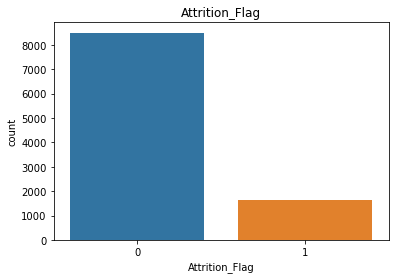

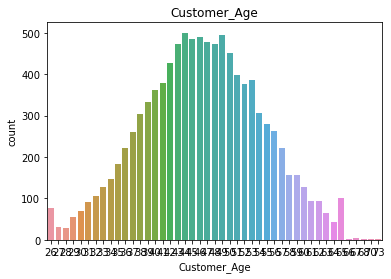

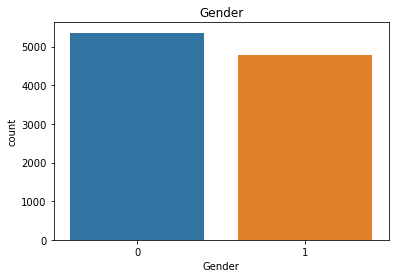

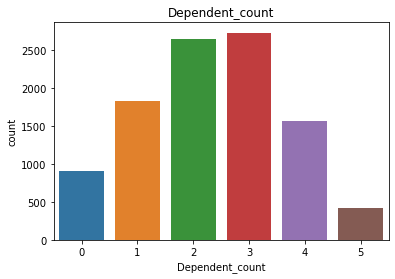

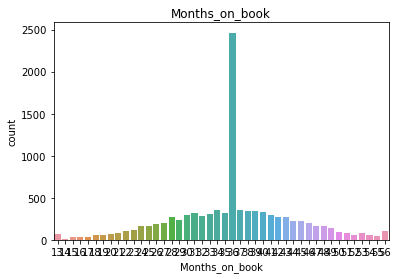

In [11]:
for fea in continuous_features[:5]:
    plt.figure()
    plt.title(fea)
    ax = sns.countplot(x=fea, data=data)

In [12]:
X.shape

(10127, 19)

In [13]:
y.shape

(10127,)

In [16]:
import sklearn.pipeline as pipe
import sklearn.preprocessing as pp
import sklearn.compose as compose
num_pipeline = pipe.Pipeline([('scaler', pp.StandardScaler())])
full_pipeline = compose.ColumnTransformer([('num', num_pipeline, numerical_attributes),
                                          ('cat', pp.OneHotEncoder(), categorical_attributes)],
                                         remainder='passthrough', sparse_threshold=0)


In [17]:
X = full_pipeline.fit_transform(X)
X.shape

(10127, 36)

# Data Split

In [18]:
# split the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# build DT model
classifier = DecisionTreeClassifier(random_state=42)# random_state=42, it will be same after each random.
classifier = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Evaluate the DT model
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9272787101020072


In [19]:
print('Number of instances: ', X.shape[0])
print('Size of Training set: ', X_train.shape[0])
print('Size of Test set: ', X_test.shape[0])
print('Number of instances: ', y.shape[0])
print('Size of Training set: ', y_train.shape[0])
print('Size of Test set: ', y_test.shape[0])

Number of instances:  10127
Size of Training set:  7088
Size of Test set:  3039
Number of instances:  10127
Size of Training set:  7088
Size of Test set:  3039


# Part1: Decision Tree

In [20]:
dt_clf = DecisionTreeClassifier(criterion='entropy', random_state=42)
# dt_clf.get_params()
df_paramGrid = {
    'criterion': ['entropy', 'gini'],
    'max_depth': range(2, 20),
}

In [21]:
df_gs = GridSearchCV(estimator=dt_clf, param_grid = df_paramGrid, scoring = 'accuracy',
                  cv=5, n_jobs=-1, verbose=10, return_train_score=True)

In [22]:
df_gs.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1884s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1984s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:    3.1s finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(criterion='entropy',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(2, 20)},
             return_train_score=True, scoring='accuracy', verbose=10)

# Learning Curve

In [23]:
# gs_res_df = pd.DataFrame(gs.cv_results_)
# best_clf = gs.best_estimator_
# data.columns[np.argmax(best_clf.feature_importances_)]
# gs_res_df.sort_values(by='rank_test_score')
df_gs_res = scikit_cv_result_to_df(df_gs.cv_results_)
df_clf = df_gs.best_estimator_
data.columns[np.argmax(df_clf.feature_importances_)]
df_gs_res.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
criterion max_depth                                                 
entropy   9               0.040458      0.007205         0.000845   
gini      8               0.042007      0.006230         0.000460   
          11              0.043501      0.002200         0.001116   
          7               0.042044      0.006009         0.000831   
entropy   11              0.034675      0.001532         0.000626   
          10              0.032282      0.001329         0.000608   
          12              0.034351      0.003231         0.000472   
gini      9               0.040414      0.003361         0.000695   
entropy   13              0.043610      0.007452         0.000925   
          8               0.048022      0.005731         0.000914   
          14              0.049150      0.006525         0.000542   
gini      6               0.041161      0.003765         0.000467   
entropy   15              0.049954      0.004921         0.000783   
gini      10              0.040348      0.006811         0.000561   
entropy   16              0.044162      0.006905         0.002196   
          17              0.046547      0.004482         0.000501   
          18              0.049469      0.005891         0.000845   
          19              0.048184      0.007311         0.001345   
gini      14              0.045529      0.002737         0.000921   
entropy   7               0.038994      0.005917         0.000949   
gini      17              0.047758      0.004690         0.000455   
          19              0.048216      0.007273         0.000590   
          12              0.047908      0.006339         0.000622   
          15              0.048077      0.004290         0.001053   
          16              0.049543      0.002868         0.000730   
          18              0.047038      0.004898         0.000459   
          13              0.046054      0.005154         0.000752   
entropy   6               0.035645      0.005110         0.000554   
gini      5               0.033830      0.007175         0.001543   
entropy   5               0.032282      0.005538         0.000869   
gini      4               0.025723      0.004512         0.000480   
entropy   4               0.029571      0.004369         0.000632   
gini      3               0.019151      0.002352         0.000758   
entropy   3               0.032028      0.013675         0.001020   
gini      2               0.013926      0.001792         0.000649   
entropy   2               0.028248      0.003633         0.001193   

                     std_score_time  mean_test_score  std_test_score  \
criterion max_depth                                                    
entropy   9                0.000328         0.942298        0.005146   
gini      8                0.000010         0.942157        0.005419   
          11               0.000618         0.941310        0.007994   
          7                0.000339         0.941027        0.006190   
entropy   11               0.000098         0.940887        0.007231   
          10               0.000056         0.940605        0.007762   
          12               0.000057         0.940464        0.006681   
gini      9                0.000278         0.940323        0.007800   
entropy   13               0.000473         0.940181        0.007167   
          8                0.000268         0.939476        0.005983   
          14               0.000117         0.939194        0.006942   
gini      6                0.000029         0.939194        0.006721   
entropy   15               0.000530         0.939053        0.007058   
gini      10               0.000145         0.939052        0.008210   
entropy   16               0.002131         0.938489        0.006954   
          17               0.000035         0.938488        0.006707   
          18               0.000367         0.938488        0.006707   
          19               0.0

In [24]:
entropy = df_gs_res.xs('entropy', level='criterion')
gini = df_gs_res.xs('gini', level='criterion')

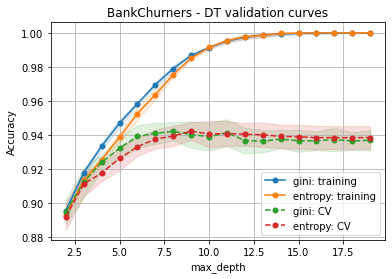

In [95]:
#Plot validation curve
plot_means_w_stds(
    means=(gini['mean_train_score'], entropy['mean_train_score'], gini['mean_test_score'], entropy['mean_test_score']),
    stds=(gini['std_train_score'], entropy['std_train_score'], gini['std_test_score'], entropy['std_test_score']),
    xrange=df_paramGrid['max_depth'],
    xlabel='max_depth',
    ylabel='Accuracy',
    series_labels=('gini: training', 'entropy: training', 'gini: CV', 'entropy: CV'),
    title='BankChurners - DT validation curves',
    ylim=None,
    markersize=None
)

In [26]:
gini_fit_mean, entropy_fit_mean = np.split(df_gs_res['mean_fit_time'], 2)
gini_fit_std, entropy_fit_std = np.split(df_gs_res['std_fit_time'], 2)

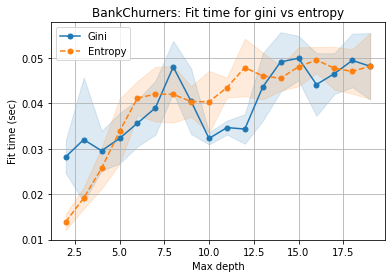

In [96]:
plot_means_w_stds(
    means=(gini_fit_mean, entropy_fit_mean),
    stds=(gini_fit_std, entropy_fit_std),
    xrange=df_paramGrid['max_depth'],
    series_labels=('Gini', 'Entropy'),
    ylabel='Fit time (sec)',
    xlabel='Max depth',
    title='BankChurners: Fit time for gini vs entropy'
)

In [28]:

best_params = df_gs.cv_results_['params'][np.argmax(df_gs_res['mean_test_score'])]
print(best_params)

print(np.max(df_gs_res['mean_test_score']))

{'criterion': 'entropy', 'max_depth': 9}
0.9422975893169084


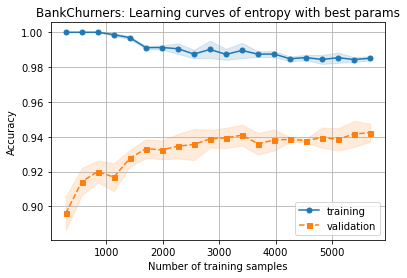

In [98]:
#Learning curver of gini (best param) #gini depth 4
dt_clf = DecisionTreeClassifier(**best_params)
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(df_clf, X_train, y_train, ylim=None, cv=5, 
                                                                                      train_sizes=np.linspace(.05, 1.0, 20), scoring='accuracy',
                                                                                     title='BankChurners: Learning curves of entropy with best params')

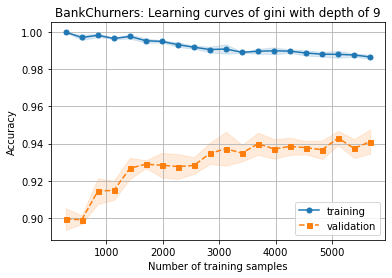

In [104]:
df_clf2 = DecisionTreeClassifier(criterion='gini', max_depth=9)
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(df_clf2, X_train, y_train, ylim=None, cv=5, 
                                                                                           train_sizes=np.linspace(.05, 1.0, 20), scoring='accuracy',
                                                                                          title='BankChurners: Learning curves of gini with depth of 9')

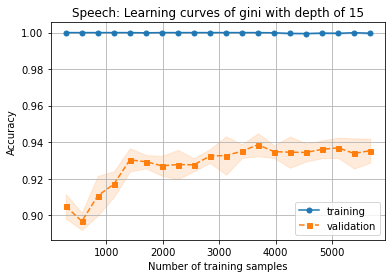

In [105]:
df_clf3 = DecisionTreeClassifier(criterion='gini', max_depth=15)
train_sizes3, train_mean3, train_std3, test_mean3, test_std3 = gen_and_plot_learning_curve(df_clf3, X_train, y_train, ylim=None, cv=5, 
                                                                                           train_sizes=np.linspace(.05, 1.0, 20), scoring='accuracy',
                                                                                          title='Speech: Learning curves of gini with depth of 15')

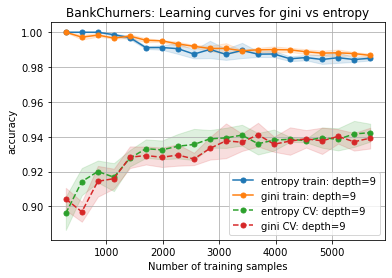

In [101]:
# Compare gini vs entropy
plot_means_w_stds(
    (train_mean, train_mean2, test_mean, test_mean2),
    (train_std, train_std2, test_std, test_std2),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['entropy train: depth=9', 'gini train: depth=9', 'entropy CV: depth=9', 'gini CV: depth=9'],
    title='BankChurners: Learning curves for gini vs entropy'
)

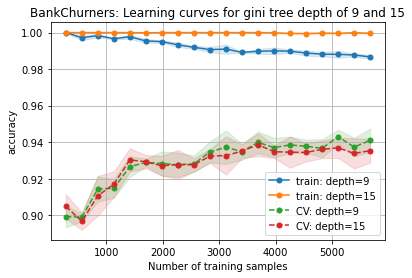

In [106]:
# Compare tree depth impact (gini)
plot_means_w_stds(
    (train_mean2, train_mean3, test_mean2, test_mean3),
    (train_std2, train_std3, test_std2, test_std3),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['train: depth=9', 'train: depth=15', 'CV: depth=9', 'CV: depth=15'],
    title='BankChurners: Learning curves for gini tree depth of 9 and 15'
)

In [169]:
# calculate test set accuracy (gini)
start_time = time.time()
df_clf.fit(X_train, y_train)
end_time = time.time()
dt_time = end_time - start_time

y_test_pred = df_clf.predict(X_test)


print(metrics.accuracy_score(y_test, y_test_pred))
dt_test_score = metrics.accuracy_score(y_test, y_test_pred)

df_clf2.fit(X_train, y_train)
y_test_pred2 = df_clf2.predict(X_test)

print(metrics.accuracy_score(y_test, y_test_pred2))

0.933201711089174
0.9387956564659428


# Part 2: SVM

In [35]:
#create Linear SVM
from sklearn.svm import LinearSVC
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import MinMaxScaler

In [36]:
#machine learning algorithms perform better when numerical input variables are scaled to a standard range
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
#Create RBF SVM

from sklearn.svm import SVC

rbf_clf = SVC(kernel='rbf', random_state=1)

rbf_paramGrid = {
    'C': np.logspace(-3, 3, 7),
    'max_iter': np.logspace(1, 5, 5),
    'gamma': np.logspace(-5, 1, 7),
}
rbf_paramGrid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}

In [38]:
rbf_gs = GridSearchCV(
    estimator=rbf_clf,
    param_grid=rbf_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [39]:
rbf_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 245 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0696s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0859s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.2s
/Users/jian/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done  93 tasks      | elapsed:    7.8s


GridSearchCV(cv=4, estimator=SVC(random_state=1), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [40]:
#RBF
rbf_res_df = scikit_cv_result_to_df(rbf_gs.cv_results_)
# best_clf = rbf_grid_search.best_estimator_
rbf_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
C      gamma   max_iter                                                 
1000.0 0.0100  100000.0       1.118379      0.035974         0.100602   
               10000.0        0.782680      0.019704         0.146519   
10.0   0.1000  100000.0       0.502145      0.021132         0.112474   
               10000.0        0.519343      0.022433         0.118287   
100.0  0.1000  100000.0       0.767502      0.025962         0.108356   
...                                ...           ...              ...   
10.0   0.0001  100.0          0.057070      0.005896         0.018303   
1.0    0.0001  100.0          0.061235      0.003709         0.020791   
100.0  10.0000 100.0          0.063834      0.003440         0.018481   
1000.0 10.0000 100.0          0.063382      0.005426         0.018928   
10.0   10.0000 100.0          0.062461      0.003215         0.021795   

                         std_score_time  mean_test_score  std_test_score  \
C      gamma   max_iter                                                    
1000.0 0.0100  100000.0        0.002300         0.920147        0.004307   
               10000.0         0.016239         0.919582        0.002946   
10.0   0.1000  100000.0        0.004669         0.918454        0.002946   
               10000.0         0.006573         0.918454        0.002946   
100.0  0.1000  100000.0        0.005848         0.916196        0.005008   
...                                 ...              ...             ...   
10.0   0.0001  100.0           0.002495         0.436653        0.041317   
1.0    0.0001  100.0           0.004049         0.436653        0.041317   
100.0  10.0000 100.0           0.001659         0.375423        0.263237   
1000.0 10.0000 100.0           0.000927         0.375423        0.263237   
10.0   10.0000 100.0           0.003992         0.375423        0.263237   

                         rank_test_score  mean_train_score  std_train_score  
C      gamma   max_iter                                                      
1000.0 0.0100  100000.0                1          0.939381         0.002092  
               10000.0                 2          0.938299         0.002449  
10.0   0.1000  100000.0                3          0.939945         0.001911  
               10000.0                 3          0.939945         0.001911  
100.0  0.1000  100000.0                5          0.968679         0.001052  
...                                  ...               ...              ...  
10.0   0.0001  100.0                 240          0.441356         0.041609  
1.0    0.0001  100.0                 240          0.441356         0.041609  
100.0  10.0000 100.0                 243          0.398279         0.268944  
1000.0 10.0000 100.0                 243          0.398279         0.268944  
10.0   10.0000 100.0                 243          0.398279         0.268944  

[245 rows x 9 columns]

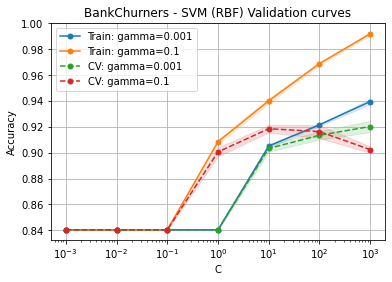

In [132]:
# Interesting cross sections above include gamma = 10^-1 and 10^-3
rbf_validation_curve1 = rbf_res_df.xs((100000.0, 0.01), level=('max_iter', 'gamma'))
rbf_validation_curve2 = rbf_res_df.xs((100000.0, 0.1), level=('max_iter', 'gamma'))
means = [rbf_validation_curve1['mean_train_score'], rbf_validation_curve2['mean_train_score'], rbf_validation_curve1['mean_test_score'], rbf_validation_curve2['mean_test_score']]
stds = [rbf_validation_curve1['std_train_score'], rbf_validation_curve2['std_train_score'], rbf_validation_curve1['std_test_score'], rbf_validation_curve2['std_test_score']]
labels = ['Train: gamma=0.001', 'Train: gamma=0.1', 'CV: gamma=0.001', 'CV: gamma=0.1']

plot_means_w_stds(means,stds,rbf_paramGrid['C'], series_labels=labels, ylabel='Accuracy', xlabel='C', logx=True, title='BankChurners - SVM (RBF) Validation curves', legend=True)

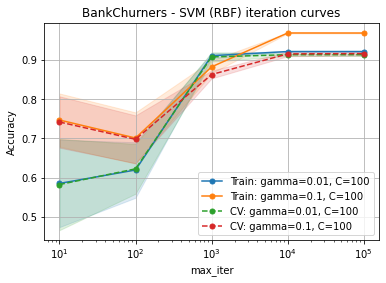

In [133]:
rbf_iter_curve1 = rbf_res_df.xs((100.0, 0.01), level=('C', 'gamma'))
rbf_iter_curve2 = rbf_res_df.xs((100.0, 0.1), level=('C', 'gamma'))
means = [rbf_iter_curve1['mean_train_score'], rbf_iter_curve2['mean_train_score'], rbf_iter_curve1['mean_test_score'], rbf_iter_curve2['mean_test_score']]
stds = [rbf_iter_curve1['std_train_score'], rbf_iter_curve2['std_train_score'], rbf_iter_curve1['std_test_score'], rbf_iter_curve2['std_test_score']]
labels = ['Train: gamma=0.01, C=100', 'Train: gamma=0.1, C=100', 'CV: gamma=0.01, C=100', 'CV: gamma=0.1, C=100']

plot_means_w_stds(means, stds, rbf_paramGrid['max_iter'], series_labels=labels, ylabel='Accuracy', xlabel='max_iter', logx=True, title='BankChurners - SVM (RBF) iteration curves', legend=True)

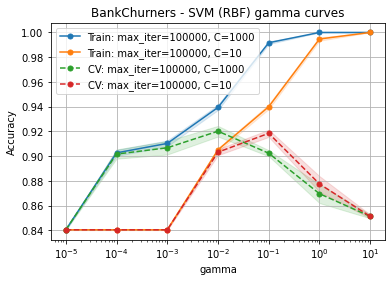

In [135]:
rbf_iter_curve1 = rbf_res_df.xs((1000, 100000), level=('C', 'max_iter'))
rbf_iter_curve2 = rbf_res_df.xs((10, 100000), level=('C', 'max_iter'))
means = [rbf_iter_curve1['mean_train_score'], rbf_iter_curve2['mean_train_score'], rbf_iter_curve1['mean_test_score'], rbf_iter_curve2['mean_test_score']]
stds = [rbf_iter_curve1['std_train_score'], rbf_iter_curve2['std_train_score'], rbf_iter_curve1['std_test_score'], rbf_iter_curve2['std_test_score']]
labels = ['Train: max_iter=100000, C=1000', 'Train: max_iter=100000, C=10', 'CV: max_iter=100000, C=1000', 'CV: max_iter=100000, C=10']

plot_means_w_stds(means, stds, rbf_paramGrid['gamma'], series_labels=labels, ylabel='Accuracy', xlabel='gamma', logx=True, title='BankChurners - SVM (RBF) gamma curves', legend=True)

In [44]:
rbf_gs.best_estimator_.get_params()

{'C': 1000.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.01,
 'kernel': 'rbf',
 'max_iter': 100000.0,
 'probability': False,
 'random_state': 1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [45]:
#Create Sigmoid SVM

from sklearn.svm import SVC

sigmoid_clf = SVC(kernel='sigmoid', random_state=1)

sigmoid_paramGrid = {
    'C': np.logspace(-3, 3, 7),
    'max_iter': np.logspace(1, 5, 5),
    'gamma': np.logspace(-5, 1, 7),
}
sigmoid_paramGrid

{'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05]),
 'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])}

In [46]:
sigmoid_gs = GridSearchCV(
    estimator=sigmoid_clf,
    param_grid=sigmoid_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [47]:
sigmoid_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 245 candidates, totalling 980 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0499s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
/Users/jian/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1496s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  70 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:    8.3s


GridSearchCV(cv=4, estimator=SVC(kernel='sigmoid', random_state=1), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'max_iter': array([1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [48]:
#RBF
sigmoid_res_df = scikit_cv_result_to_df(sigmoid_gs.cv_results_)
# best_clf = sigmoid_grid_search.best_estimator_
sigmoid_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
C       gamma max_iter                                                 
1000.00 0.001 100000.0       0.481240      0.014619         0.111259   
              10000.0        0.460444      0.005086         0.121813   
100.00  0.010 100000.0       0.458299      0.005347         0.111461   
              10000.0        0.492444      0.015753         0.099932   
1000.00 0.001 1000.0         0.384348      0.005942         0.114175   
...                               ...           ...              ...   
0.01    1.000 10.0           0.011278      0.002083         0.003890   
1.00    1.000 10.0           0.018204      0.004444         0.003857   
100.00  1.000 10.0           0.012770      0.001786         0.004678   
10.00   1.000 10.0           0.020033      0.003804         0.006119   
1000.00 1.000 10.0           0.013584      0.000928         0.002969   

                        std_score_time  mean_test_score  std_test_score  \
C       gamma max_iter                                                    
1000.00 0.001 100000.0        0.009011         0.905756        0.004279   
              10000.0         0.033636         0.905756        0.004279   
100.00  0.010 100000.0        0.012781         0.905615        0.004844   
              10000.0         0.001011         0.905615        0.004844   
1000.00 0.001 1000.0          0.013973         0.903922        0.004396   
...                                ...              ...             ...   
0.01    1.000 10.0            0.001759         0.329712        0.289246   
1.00    1.000 10.0            0.001711         0.329289        0.288513   
100.00  1.000 10.0            0.001824         0.329289        0.288513   
10.00   1.000 10.0            0.002202         0.329289        0.288513   
1000.00 1.000 10.0            0.000076         0.323222        0.273128   

                        rank_test_score  mean_train_score  std_train_score  
C       gamma max_iter                                                      
1000.00 0.001 100000.0                1          0.907167         0.001398  
              10000.0                 1          0.907214         0.001391  
100.00  0.010 100000.0                3          0.906509         0.001770  
              10000.0                 3          0.906603         0.001675  
1000.00 0.001 1000.0                  5          0.905568         0.001317  
...                                 ...               ...              ...  
0.01    1.000 10.0                  239          0.330747         0.289192  
1.00    1.000 10.0                  242          0.329007         0.286504  
100.00  1.000 10.0                  242          0.329007         0.286504  
10.00   1.000 10.0                  242          0.329007         0.286504  
1000.00 1.000 10.0                  245          0.322282         0.270953  

[245 rows x 9 columns]

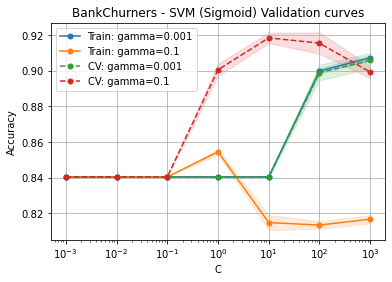

In [110]:
# cross sections above include gamma = 10^-1 and 10^-3
sigmoid_validation_curve1 = sigmoid_res_df.xs((10000.0, 0.001), level=('max_iter', 'gamma'))
sigmoid_validation_curve2 = sigmoid_res_df.xs((10000.0, 0.1), level=('max_iter', 'gamma'))
means = [sigmoid_validation_curve1['mean_train_score'], sigmoid_validation_curve2['mean_train_score'], sigmoid_validation_curve1['mean_test_score'], rbf_validation_curve2['mean_test_score']]
stds = [sigmoid_validation_curve1['std_train_score'], sigmoid_validation_curve2['std_train_score'], sigmoid_validation_curve1['std_test_score'], rbf_validation_curve2['std_test_score']]
labels = ['Train: gamma=0.001', 'Train: gamma=0.1', 'CV: gamma=0.001', 'CV: gamma=0.1']

plot_means_w_stds(means,stds,sigmoid_paramGrid['C'], series_labels=labels, ylabel='Accuracy', xlabel='C', logx=True, title='BankChurners - SVM (Sigmoid) Validation curves', legend=True)

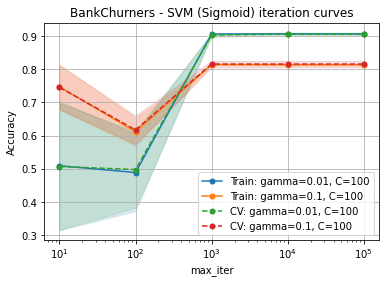

In [111]:
sigmoid_iter_curve1 = sigmoid_res_df.xs((100.0, 0.01), level=('C', 'gamma'))
sigmoid_iter_curve2 = sigmoid_res_df.xs((100.0, 0.1), level=('C', 'gamma'))
means = [sigmoid_iter_curve1['mean_train_score'], sigmoid_iter_curve2['mean_train_score'], sigmoid_iter_curve1['mean_test_score'], sigmoid_iter_curve2['mean_test_score']]
stds = [sigmoid_iter_curve1['std_train_score'], sigmoid_iter_curve2['std_train_score'], sigmoid_iter_curve1['std_test_score'], sigmoid_iter_curve2['std_test_score']]
labels = ['Train: gamma=0.01, C=100', 'Train: gamma=0.1, C=100', 'CV: gamma=0.01, C=100', 'CV: gamma=0.1, C=100']

plot_means_w_stds(means, stds, sigmoid_paramGrid['max_iter'], series_labels=labels, ylabel='Accuracy', xlabel='max_iter', logx=True, title='BankChurners - SVM (Sigmoid) iteration curves', legend=True)

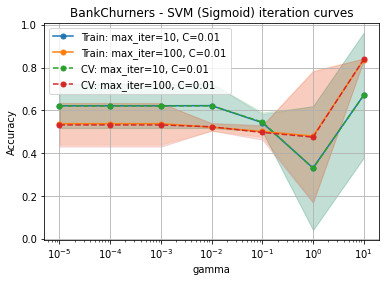

In [112]:
sigmoid_iter_curve1 = sigmoid_res_df.xs((0.1, 10), level=('C', 'max_iter'))
sigmoid_iter_curve2 = sigmoid_res_df.xs((0.01, 100), level=('C', 'max_iter'))
means = [sigmoid_iter_curve1['mean_train_score'], sigmoid_iter_curve2['mean_train_score'], sigmoid_iter_curve1['mean_test_score'], sigmoid_iter_curve2['mean_test_score']]
stds = [sigmoid_iter_curve1['std_train_score'], sigmoid_iter_curve2['std_train_score'], sigmoid_iter_curve1['std_test_score'], sigmoid_iter_curve2['std_test_score']]
labels = ['Train: max_iter=10, C=0.01', 'Train: max_iter=100, C=0.01', 'CV: max_iter=10, C=0.01', 'CV: max_iter=100, C=0.01']

plot_means_w_stds(means, stds, sigmoid_paramGrid['gamma'], series_labels=labels, ylabel='Accuracy', xlabel='gamma', logx=True, title='BankChurners - SVM (Sigmoid) iteration curves', legend=True)

# Learning curve of RBF & Sigmoid SVM

{'C': 1000.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100000.0, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


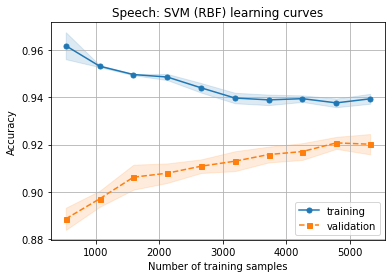

In [115]:
#RBF SVM learning curve
best_clf = rbf_gs.best_estimator_
print(best_clf.get_params())
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(best_clf, X_train_scaled, y_train, 
                                                                                      scoring='accuracy', ylabel='Accuracy', cv=4, n_jobs=-1, title='Speech: SVM (RBF) learning curves')

{'C': 1000.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.001, 'kernel': 'sigmoid', 'max_iter': 10000.0, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


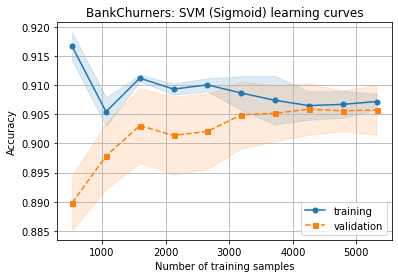

In [113]:
#Sigmoid SVM learning curve
best_clf2 = sigmoid_gs.best_estimator_
print(best_clf2.get_params())
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(best_clf2, X_train_scaled, y_train, 
                                                                                      scoring='accuracy', ylabel='Accuracy', cv=4, n_jobs=-1, title='BankChurners: SVM (Sigmoid) learning curves')

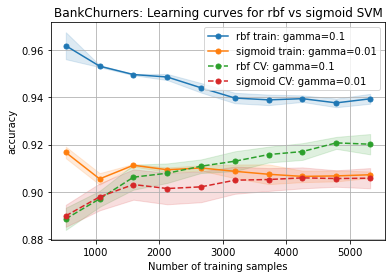

In [116]:
# Compare rbf vs sigmoid
plot_means_w_stds(
    (train_mean, train_mean2, test_mean, test_mean2),
    (train_std, train_std2, test_std, test_std2),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['rbf train: gamma=0.1', 'sigmoid train: gamma=0.01', 'rbf CV: gamma=0.1', 'sigmoid CV: gamma=0.01'],
    title='BankChurners: Learning curves for rbf vs sigmoid SVM'
)

In [55]:
# the best SVM clf with rbf kernal is better than that with sigmoid kernal, especially when the training samples are larger than 100. 

In [170]:
# calculate test set accuracy (RBF SVM)
start_time = time.time()
best_clf.fit(X_train_scaled, y_train)
end_time = time.time()
svm_time = end_time - start_time

y_test_pred = best_clf.predict(X_test_scaled)

rbf_svm_accuracy = metrics.accuracy_score(y_test, y_test_pred)
svm_test_score = metrics.accuracy_score(y_test, y_test_pred)

#sigmoid
best_clf2.fit(X_train_scaled, y_train)
y_test_pred2 = best_clf2.predict(X_test_scaled)

sigmoid_svm_accuracy = metrics.accuracy_score(y_test, y_test_pred2)
print(rbf_svm_accuracy)
print(sigmoid_svm_accuracy)

/Users/jian/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


0.9174070417900625
0.8983218163869694


/Users/jian/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:246: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


# Part 3: Boosting

In [82]:
# Gradient Boosting
# different hyperparameters
from sklearn.ensemble import GradientBoostingClassifier as gbm


In [83]:
#Create Gradient Boosting

gbm_clf = gbm(random_state=1)

gbm_paramGrid = {
    'n_estimators': np.array([10, 50, 100, 200]).astype('int'),
    'learning_rate': np.array([0.1, 0.5, 1]),
    'max_depth': range(1, 20),
}
gbm_paramGrid

{'n_estimators': array([ 10,  50, 100, 200]),
 'learning_rate': array([0.1, 0.5, 1. ]),
 'max_depth': range(1, 20)}

In [84]:
gbm_gs = GridSearchCV(
    estimator=gbm_clf,
    param_grid=gbm_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [85]:
gbm_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 228 candidates, totalling 912 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   45.2s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

GridSearchCV(cv=4, estimator=GradientBoostingClassifier(random_state=1),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.5, 1. ]),
                         'max_depth': range(1, 20),
                         'n_estimators': array([ 10,  50, 100, 200])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [86]:
gbm_res_df = scikit_cv_result_to_df(gbm_gs.cv_results_)
# best_clf = rbf_grid_search.best_estimator_
gbm_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  \
learning_rate max_depth n_estimators                                
0.5           4         200                4.989117      0.017354   
0.1           6         200                6.318691      0.026899   
              5         200                5.290775      0.042562   
0.5           6         200                7.532820      0.060293   
              3         100                1.945768      0.035881   
...                                             ...           ...   
              1         10                 0.075643      0.004415   
0.1           3         10                 0.164793      0.002949   
              1         50                 0.341332      0.016612   
              2         10                 0.119729      0.006158   
              1         10                 0.079010      0.012412   

                                      mean_score_time  std_score_time  \
learning_rate max_depth n_estimators                                    
0.5           4         200                  0.008799        0.000959   
0.1           6         200                  0.010865        0.001672   
              5         200                  0.009915        0.000580   
0.5           6         200                  0.013352        0.000529   
              3         100                  0.004197        0.001162   
...                                               ...             ...   
              1         10                   0.000855        0.000099   
0.1           3         10                   0.002375        0.002009   
              1         50                   0.003753        0.003342   
              2         10                   0.000761        0.000016   
              1         10                   0.001314        0.000557   

                                      mean_test_score  std_test_score  \
learning_rate max_depth n_estimators                                    
0.5           4         200                  0.973617        0.005006   
0.1           6         200                  0.973053        0.002888   
              5         200                  0.972630        0.002919   
0.5           6         200                  0.972489        0.001756   
              3         100                  0.972348        0.003848   
...                                               ...             ...   
              1         10                   0.915350        0.002292   
0.1           3         10                   0.906038        0.002130   
              1         50                   0.898561        0.004342   
              2         10                   0.882619        0.005671   
              1         10                   0.840435        0.000244   

                                      rank_test_score  mean_train_score  \
learning_rate max_depth n_estimators                                      
0.5           4         200                         1          1.000000   
0.1           6         200                         2          1.000000   
              5         200                         3          1.000000   
0.5           6         200                         4          1.000000   
              3         100                         5          0.999859   
...                                               ...               ...   
              1         10                        224          0.916479   
0.1           3         10                        225          0.910882   
              1         50                        226          0.900536   
              2         10                        227          0.885863   
              1         10                        228          0.840435   

                                      std_train_score  
learning_rate max_depth n_estimators                   
0.5           4         200                  0.000000  
0.1           6         200                  0.000000  
              5         200             

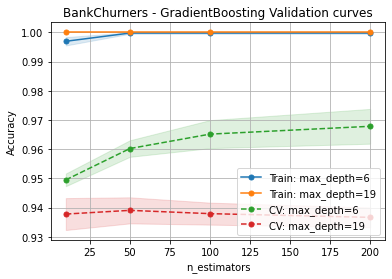

In [117]:
gbm_validation_curve1 = gbm_res_df.xs((1.0, 6), level=('learning_rate', 'max_depth'))
gbm_validation_curve2 = gbm_res_df.xs((1.0, 19), level=('learning_rate', 'max_depth'))
means = [gbm_validation_curve1['mean_train_score'], gbm_validation_curve2['mean_train_score'], gbm_validation_curve1['mean_test_score'], gbm_validation_curve2['mean_test_score']]
stds = [gbm_validation_curve1['std_train_score'], gbm_validation_curve2['std_train_score'], gbm_validation_curve1['std_test_score'], gbm_validation_curve2['std_test_score']]
labels = ['Train: max_depth=6', 'Train: max_depth=19', 'CV: max_depth=6', 'CV: max_depth=19']

plot_means_w_stds(means,stds,gbm_paramGrid['n_estimators'], series_labels=labels, ylabel='Accuracy', xlabel='n_estimators', logx=False, title='BankChurners - GradientBoosting Validation curves', legend=True)

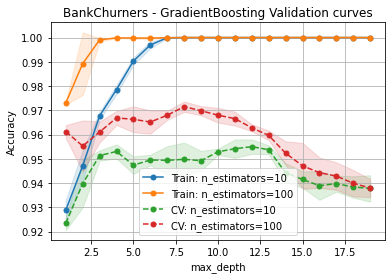

In [118]:
gbm_validation_curve1 = gbm_res_df.xs((1.0, 10), level=('learning_rate', 'n_estimators'))
gbm_validation_curve2 = gbm_res_df.xs((1.0, 100), level=('learning_rate', 'n_estimators'))
means = [gbm_validation_curve1['mean_train_score'], gbm_validation_curve2['mean_train_score'], gbm_validation_curve1['mean_test_score'], gbm_validation_curve2['mean_test_score']]
stds = [gbm_validation_curve1['std_train_score'], gbm_validation_curve2['std_train_score'], gbm_validation_curve1['std_test_score'], gbm_validation_curve2['std_test_score']]
labels = ['Train: n_estimators=10', 'Train: n_estimators=100', 'CV: n_estimators=10', 'CV: n_estimators=100']

plot_means_w_stds(means,stds,gbm_paramGrid['max_depth'], series_labels=labels, ylabel='Accuracy', xlabel='max_depth', logx=False, title='BankChurners - GradientBoosting Validation curves', legend=True)

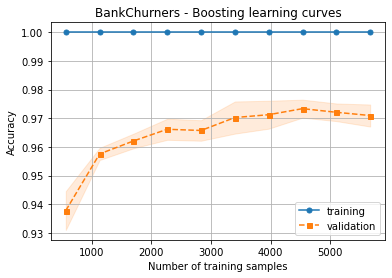

In [137]:
boosting_clf1 = gbm(n_estimators=200, learning_rate = 0.5, max_depth=4, random_state= 2)
train_sizes1, train_mean1, train_std1, test_mean1, test_std1 = gen_and_plot_learning_curve(boosting_clf1, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='BankChurners - Boosting learning curves')

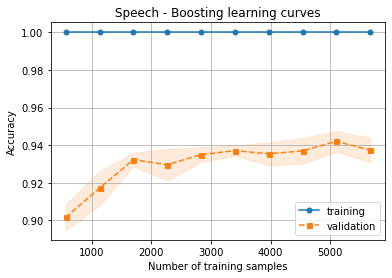

In [90]:
boosting_clf2 = gbm(n_estimators=50, learning_rate =0.1, max_depth=15, random_state= 2)
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(boosting_clf2, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='Speech - Boosting learning curves')

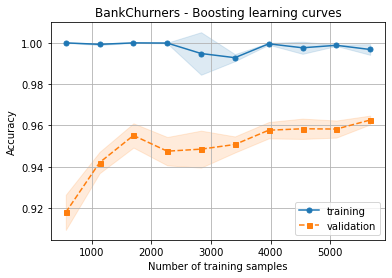

In [120]:
boosting_clf3 = gbm(n_estimators=50, learning_rate = 1, max_depth=3, random_state= 2)
train_sizes3, train_mean3, train_std3, test_mean3, test_std3 = gen_and_plot_learning_curve(boosting_clf3, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='BankChurners - Boosting learning curves')

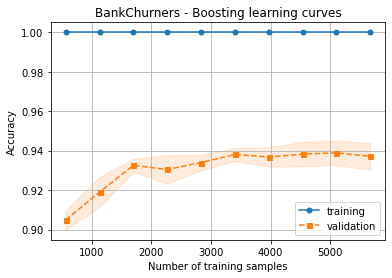

In [121]:
boosting_clf4 = gbm(n_estimators=50, learning_rate = 1, max_depth=15, random_state= 2)
train_sizes4, train_mean4, train_std4, test_mean4, test_std4 = gen_and_plot_learning_curve(boosting_clf4, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='BankChurners - Boosting learning curves')

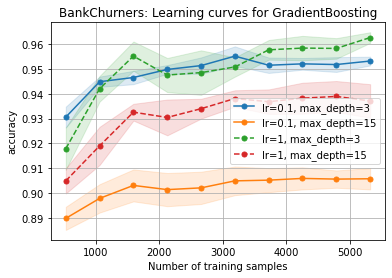

In [122]:
# compare boosting
plot_means_w_stds(
    (test_mean1, test_mean2, test_mean3, test_mean4),
    (test_std1, test_std2, test_std3, test_std4),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['lr=0.1, max_depth=3', 'lr=0.1, max_depth=15', 'lr=1, max_depth=3', 'lr=1, max_depth=15'],
    title='BankChurners: Learning curves for GradientBoosting'
)

In [171]:
# calculate test set accuracy 
start_time = time.time()
boosting_clf1.fit(X_train_scaled, y_train)
end_time = time.time()
boosting_time = end_time - start_time

y_test_pred1 = boosting_clf1.predict(X_test_scaled)

print('lr=0.1, max_depth=3, Accuracy=', metrics.accuracy_score(y_test, y_test_pred1))
boosting_test_score = metrics.accuracy_score(y_test, y_test_pred1)

# calculate test set accuracy 
boosting_clf2.fit(X_train_scaled, y_train)
y_test_pred2 = boosting_clf2.predict(X_test_scaled)

print('lr=0.1, max_depth=15, Accuracy=', metrics.accuracy_score(y_test, y_test_pred2))
# calculate test set accuracy 
boosting_clf3.fit(X_train_scaled, y_train)
y_test_pred3 = boosting_clf3.predict(X_test_scaled)

print('lr=1, max_depth=3, Accuracy=', metrics.accuracy_score(y_test, y_test_pred3))
# calculate test set accuracy 
boosting_clf4.fit(X_train_scaled, y_train)
y_test_pred4 = boosting_clf4.predict(X_test_scaled)

print('lr=1, max_depth=15, Accuracy=', metrics.accuracy_score(y_test, y_test_pred4))

lr=0.1, max_depth=3, Accuracy= 0.9647910496873972
lr=0.1, max_depth=15, Accuracy= 0.9279368213228035
lr=1, max_depth=3, Accuracy= 0.9572227706482396
lr=1, max_depth=15, Accuracy= 0.9341888779203685


# Part 4: Neural Networks

In [57]:
from sklearn.neural_network import MLPClassifier

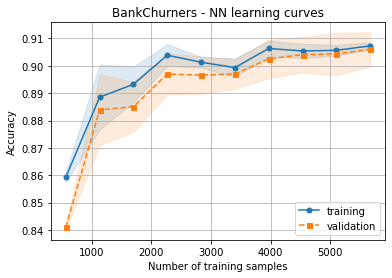

In [123]:
nn_clf1 = MLPClassifier(hidden_layer_sizes =3, activation='identity', max_iter = 200)
train_sizes1, train_mean1, train_std1, test_mean1, test_std1 = gen_and_plot_learning_curve(nn_clf1, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='BankChurners - NN learning curves')

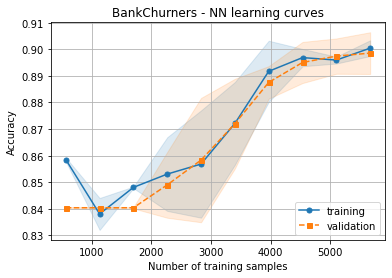

In [124]:
nn_clf1 = MLPClassifier(hidden_layer_sizes =3, activation='logistic', max_iter = 200)
train_sizes1, train_mean1, train_std1, test_mean1, test_std1 = gen_and_plot_learning_curve(nn_clf1, X_train_scaled, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='BankChurners - NN learning curves')

In [141]:
nn_clf = MLPClassifier(hidden_layer_sizes =2, activation='identity')

nn_paramGrid = {
    'hidden_layer_sizes': np.array([10, 50, 100, 200, 400, 600]).astype('int'),
    'max_iter': np.logspace(1, 4, 4).astype('int'),
    'activation': np.array(['identity', 'logistic', 'tanh', 'relu'])
}
nn_paramGrid

{'hidden_layer_sizes': array([ 10,  50, 100, 200, 400, 600]),
 'max_iter': array([   10,   100,  1000, 10000]),
 'activation': array(['identity', 'logistic', 'tanh', 'relu'], dtype='<U8')}

In [142]:
nn_gs = GridSearchCV(
    estimator=nn_clf,
    param_grid=nn_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [143]:
nn_gs.fit(X_train_scaled, y_train)

Fitting 4 folds for each of 96 candidates, totalling 384 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   11.6s
/Users/jian/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   19.4s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 112 tasks     

GridSearchCV(cv=4,
             estimator=MLPClassifier(activation='identity',
                                     hidden_layer_sizes=2),
             n_jobs=-1,
             param_grid={'activation': array(['identity', 'logistic', 'tanh', 'relu'], dtype='<U8'),
                         'hidden_layer_sizes': array([ 10,  50, 100, 200, 400, 600]),
                         'max_iter': array([   10,   100,  1000, 10000])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [144]:
nn_gs.best_estimator_

MLPClassifier(hidden_layer_sizes=10, max_iter=10000)

In [145]:
#NN
nn_res_df = scikit_cv_result_to_df(nn_gs.cv_results_)

nn_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  \
activation hidden_layer_sizes max_iter                                
relu       10                 10000          9.381553      1.709624   
           50                 10000         11.387991      2.488201   
tanh       10                 1000          11.726785      0.419802   
                              10000         11.436794      0.638407   
relu       400                100            9.869568      0.070118   
...                                               ...           ...   
           10                 10             0.161355      0.006708   
logistic   10                 10             0.112097      0.006738   
           100                10             0.353244      0.040249   
           200                10             0.542492      0.012645   
           50                 10             0.184601      0.003523   

                                        mean_score_time  std_score_time  \
activation hidden_layer_sizes max_iter                                    
relu       10                 10000            0.001174        0.000508   
           50                 10000            0.003198        0.001857   
tanh       10                 1000             0.001325        0.000584   
                              10000            0.001407        0.000397   
relu       400                100              0.038147        0.006672   
...                                                 ...             ...   
           10                 10               0.000923        0.000023   
logistic   10                 10               0.001026        0.000350   
           100                10               0.004680        0.001764   
           200                10               0.009430        0.001228   
           50                 10               0.003365        0.001512   

                                        mean_test_score  std_test_score  \
activation hidden_layer_sizes max_iter                                    
relu       10                 10000            0.926919        0.005594   
           50                 10000            0.924661        0.005650   
tanh       10                 1000             0.924520        0.007275   
                              10000            0.923956        0.004521   
relu       400                100              0.923533        0.001163   
...                                                 ...             ...   
           10                 10               0.840858        0.000691   
logistic   10                 10               0.840435        0.000244   
           100                10               0.840435        0.000244   
           200                10               0.840435        0.000244   
           50                 10               0.840435        0.000244   

                                        rank_test_score  mean_train_score  \
activation hidden_layer_sizes max_iter                                      
relu       10                 10000                   1          0.942814   
           50                 10000                   2          0.963789   
tanh       10                 1000                    3          0.947141   
                              10000                   4          0.947705   
relu       400                100                     5          0.960214   
...                                                 ...               ...   
           10                 10                     92          0.841140   
logistic   10                 10                     93          0.840435   
           100                10                     93          0.840435   
           200                10                     93          0.840435   
           50                 10                     93          0.840435   

                                        std_train_score  
activation hidden_layer_sizes max_iter                   
relu       10                 10000           

In [146]:
relu = nn_res_df.xs('relu', level='activation')
logistic = nn_res_df.xs('logistic', level='activation')

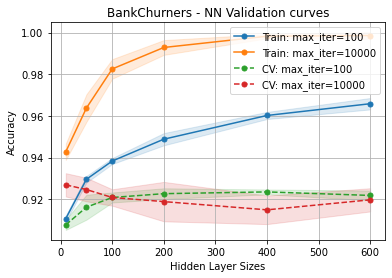

In [149]:
# 
validation_curve1 = nn_res_df.xs((100, 'relu'), level=('max_iter', 'activation'))
validation_curve2 = nn_res_df.xs((10000, 'relu'), level=('max_iter', 'activation'))
means = [validation_curve1['mean_train_score'], validation_curve2['mean_train_score'], validation_curve1['mean_test_score'], validation_curve2['mean_test_score']]
stds = [validation_curve1['std_train_score'], validation_curve2['std_train_score'], validation_curve1['std_test_score'], validation_curve2['std_test_score']]
labels = ['Train: max_iter=100', 'Train: max_iter=10000', 'CV: max_iter=100', 'CV: max_iter=10000']

plot_means_w_stds(means,stds,nn_paramGrid['hidden_layer_sizes'], series_labels=labels, ylabel='Accuracy', xlabel='Hidden Layer Sizes', logx=False, title='BankChurners - NN Validation curves', legend=True)

# plot_means_w_stds(
#     means=(relu['mean_train_score'], logistic['mean_train_score'], relu['mean_test_score'], logistic['mean_test_score']),
#     stds=(relu['std_train_score'], logistic['std_train_score'], relu['std_test_score'], logistic['std_test_score']),
#     xrange=paramGrid['hidden_layer_sizes'],
#     xlabel='hidden_layer_sizes',
#     ylabel='Accuracy',
#     series_labels=('relu: training', 'logistic: training', 'relu: CV', 'logistic: CV'),
#     title='Speech - NN validation curves',
#     ylim=None,
#     markersize=None
# )

{'C': 1000.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 0.01, 'kernel': 'rbf', 'max_iter': 100000.0, 'probability': False, 'random_state': 1, 'shrinking': True, 'tol': 0.001, 'verbose': False}


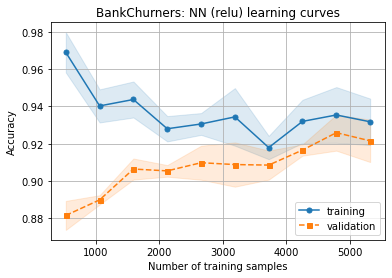

In [150]:
# Learning Curve _NN
#RBF SVM learning curve
nn_clf = nn_gs.best_estimator_
print(best_clf.get_params())
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(nn_clf, X_train_scaled, y_train, 
                                                                                      scoring='accuracy', ylabel='Accuracy', cv=4, n_jobs=-1, title='BankChurners: NN (relu) learning curves')

In [172]:
# calculate test set accuracy 
start_time = time.time()
nn_clf.fit(X_train_scaled, y_train)
end_time = time.time()
nn_time = end_time - start_time

y_test_pred1 = nn_clf.predict(X_test_scaled)
print(metrics.accuracy_score(y_test, y_test_pred1))
nn_test_score = metrics.accuracy_score(y_test, y_test_pred1)


0.9335307666995722


# Part 5: K - Nearest Neighbors

In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn_clf = KNeighborsClassifier()
knn_paramGrid = {
    'n_neighbors': np.linspace(1, 20, 20).astype('int'),
    'algorithm': np.array(['auto', 'ball_tree', 'kd_tree', 'brute'])
}
knn_paramGrid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20]),
 'algorithm': array(['auto', 'ball_tree', 'kd_tree', 'brute'], dtype='<U9')}

In [72]:
knn_gs = GridSearchCV(
    estimator=knn_clf,
    param_grid=knn_paramGrid,
    scoring='accuracy',
    return_train_score=True,
    cv=4,
    verbose=10,
    n_jobs=-1,
)

In [73]:
knn_gs.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   37.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

GridSearchCV(cv=4, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': array(['auto', 'ball_tree', 'kd_tree', 'brute'], dtype='<U9'),
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             return_train_score=True, scoring='accuracy', verbose=10)

In [74]:
knn_gs.best_estimator_

KNeighborsClassifier(n_neighbors=7)

In [75]:
knn_res_df = scikit_cv_result_to_df(knn_gs.cv_results_)

knn_res_df.sort_values(by='rank_test_score')

mean_fit_time  std_fit_time  mean_score_time  \
algorithm n_neighbors                                                 
ball_tree 7                 0.016983      0.001337         0.579276   
kd_tree   7                 0.016706      0.000356         0.751551   
brute     7                 0.005894      0.004048         0.464411   
auto      7                 0.016708      0.000489         0.759984   
kd_tree   5                 0.017413      0.000754         0.776973   
...                              ...           ...              ...   
          2                 0.019591      0.002713         0.750631   
ball_tree 1                 0.017549      0.001498         0.571129   
kd_tree   1                 0.018136      0.002583         0.732385   
brute     1                 0.002417      0.000453         0.312429   
auto      1                 0.013481      0.002966         0.685735   

                       std_score_time  mean_test_score  std_test_score  \
algorithm n_neighbors                                                    
ball_tree 7                  0.023943         0.911541        0.002775   
kd_tree   7                  0.010912         0.911541        0.002775   
brute     7                  0.191948         0.911541        0.002775   
auto      7                  0.009494         0.911541        0.002775   
kd_tree   5                  0.012410         0.910553        0.005055   
...                               ...              ...             ...   
          2                  0.018100         0.890378        0.005815   
ball_tree 1                  0.028932         0.885863        0.006030   
kd_tree   1                  0.012601         0.885863        0.006030   
brute     1                  0.041635         0.885863        0.006030   
auto      1                  0.004969         0.885863        0.006030   

                       rank_test_score  mean_train_score  std_train_score  
algorithm n_neighbors                                                      
ball_tree 7                          1          0.927624         0.002203  
kd_tree   7                          1          0.927624         0.002203  
brute     7                          1          0.927624         0.002203  
auto      7                          1          0.927624         0.002203  
kd_tree   5                          5          0.934913         0.002800  
...                                ...               ...              ...  
          2                         73          0.934443         0.002715  
ball_tree 1                         77          1.000000         0.000000  
kd_tree   1                         77          1.000000         0.000000  
brute     1                         77          1.000000         0.000000  
auto      1                         77          1.000000         0.000000  

[80 rows x 9 columns]

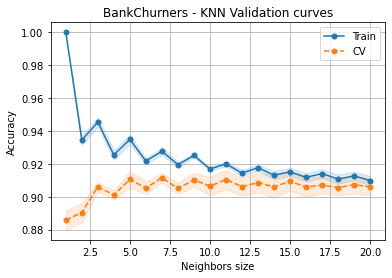

In [139]:
knn_validation_curve1 = knn_res_df.xs(('auto'), level=('algorithm'))
means = [knn_validation_curve1['mean_train_score'], knn_validation_curve1['mean_test_score'] ]
stds = [knn_validation_curve1['std_train_score'], knn_validation_curve1['std_test_score'] ]
labels = ['Train', 'CV']

plot_means_w_stds(means,stds,knn_paramGrid['n_neighbors'], series_labels=labels, ylabel='Accuracy', xlabel='Neighbors size', logx=False, title='BankChurners - KNN Validation curves', legend=True)


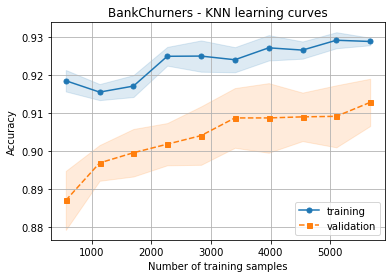

In [140]:
knn_clf = KNeighborsClassifier(n_neighbors=7)
train_sizes, train_mean, train_std, test_mean, test_std = gen_and_plot_learning_curve(knn_clf, X_train, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='BankChurners - KNN learning curves')

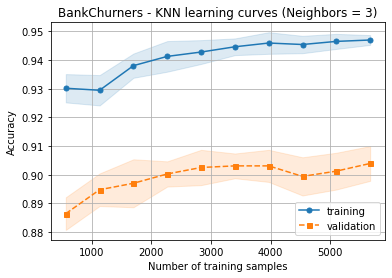

In [129]:
knn_clf2 = KNeighborsClassifier(n_neighbors=3)
train_sizes2, train_mean2, train_std2, test_mean2, test_std2 = gen_and_plot_learning_curve(knn_clf2, X_train, y_train, ylim=None, cv=5, n_jobs=-1, scoring='accuracy', ylabel='Accuracy', title='BankChurners - KNN learning curves (Neighbors = 3)')

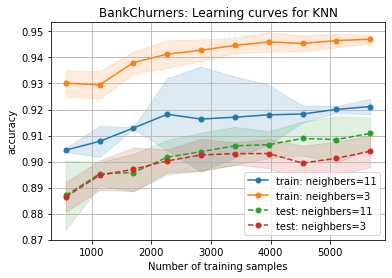

In [130]:
# compare neighbors size
plot_means_w_stds(
    (train_mean, train_mean2, test_mean, test_mean2),
    (train_std1, train_std2, test_std, test_std2),
    train_sizes,
    xlabel='Number of training samples',
    ylabel='accuracy',
    series_labels=['train: neighbers=11', 'train: neighbers=3', 'test: neighbers=11', 'test: neighbers=3'],
    title='BankChurners: Learning curves for KNN'
)

In [173]:
# calculate test set accuracy 
start_time = time.time()
knn_clf.fit(X_train, y_train)
end_time = time.time()
knn_time = end_time - start_time

y_test_pred = knn_clf.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred))
knn_test_score = metrics.accuracy_score(y_test, y_test_pred)

0.9095097071405067


In [81]:
knn_clf2.fit(X_train, y_train)
y_test_pred2 = knn_clf2.predict(X_test)
print(metrics.accuracy_score(y_test, y_test_pred2))

0.9016123724909509


# compare above 5 algorithms

In [163]:
print(dt_test_score)
print(svm_test_score)
print(boosting_test_score)
print(nn_test_score)
print(knn_test_score)

0.933201711089174
0.9174070417900625
0.9647910496873972
0.9029285949325436
0.9095097071405067


In [164]:
models = ['DT', 'SVM', 'Boosting', 'NN', 'KNN']
test_scores = [dt_test_score, svm_test_score, boosting_test_score, nn_test_score, knn_test_score]

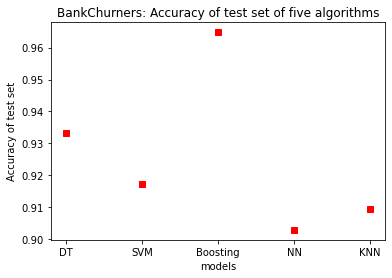

In [166]:
fig = plt.figure()
ax = plt.axes()
plt.xlabel('models')
plt.ylabel('Accuracy of test set')
plt.title('BankChurners: Accuracy of test set of five algorithms')
ax.plot(models, test_scores, 's', color='red')

In [174]:
# fit times.
times = [dt_time, svm_time, boosting_time, nn_time, knn_time]
print(times)

[0.07963681221008301, 0.9931342601776123, 3.932417154312134, 7.0281662940979, 0.026050090789794922]


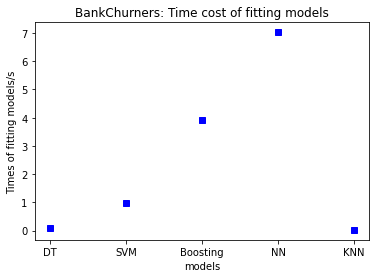

In [176]:
fig2 = plt.figure()
ax2 = plt.axes()
plt.xlabel('models')
plt.ylabel('Times of fitting models/s')
plt.title('BankChurners: Time cost of fitting models')
ax2.plot(models, times, 's', color='blue')